# Rakuten France Multimodal Product Data Classification

## Table of Contents

<p><div class="lev1 toc-item"><a href="#RAMP-on-Rakuten France Multimodal product data Classification" data-toc-modified-id="RAMP-on-Rakuten France Multimodal product data Classification" ></div><div class="lev2 toc-item"><a href="#Introduction" data-toc-modified-id="Introduction-1.1"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>Introduction</a></div><div class="lev2 toc-item">
<a href="#Problem description" data-toc-modified-id="Problem description-1.1.1"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>Problem description</a></div><div class="lev2 toc-item"><a href="#Getting-started-with-the-RAMP-starting-kit" data-toc-modified-id="Getting-started-with-the-RAMP-starting-kit-1.2"><span class="toc-item-num">1.2&nbsp;&nbsp;</span>Getting started with the RAMP starting kit</a></div><div class="lev3 toc-item"><a href="#Software-prerequisites" data-toc-modified-id="Software-prerequisites-1.2.1"><span class="toc-item-num">1.2.1&nbsp;&nbsp;</span>Software prerequisites</a></div><div class="lev3 toc-item"><a href="#Getting-the-data" data-toc-modified-id="Getting-the-data-1.2.2"><span class="toc-item-num">1.2.2&nbsp;&nbsp;</span>Getting the data</a></div><div class="lev2 toc-item"><a href="#The-data" data-toc-modified-id="The-data-1.3"><span class="toc-item-num">1.3&nbsp;&nbsp;</span>The data</a></div><div class="lev3 toc-item"></div><div class="lev3 toc-item"><a href="#Multi-Class Imbalanced Classification" data-toc-modified-id="Multi-Class Imbalanced Classification-1.3.4"><span class="toc-item-num">1.3.4&nbsp;&nbsp;</span>Multi-Class Imbalanced Classification</a></div><div class="lev3 toc-item"></div><div class="lev2 toc-item"><a href="#Workflow" data-toc-modified-id="Workflow-1.4"><span class="toc-item-num">1.4&nbsp;&nbsp;</span>Workflow</a></div><div class="lev3 toc-item"><a href="#The-model-to-submit" data-toc-modified-id="The-model-to-submit-1.4.1"><span class="toc-item-num">1.4.1&nbsp;&nbsp;</span>The model to submit</a></div><div class="lev3 toc-item"><a href="#Metric" data-toc-modified-id="Metric-1.4.2"><span class="toc-item-num">1.4.2&nbsp;&nbsp;</span>Metric</a></div><div class="lev3 toc-item"></div><div class="lev2 toc-item"><a href="#Submitting-to-the-online-challenge:-ramp.studio" data-toc-modified-id="Submitting-to-the-online-challenge:-ramp.studio-1.5"><span class="toc-item-num">1.5&nbsp;&nbsp;</span>Submitting to the online challenge: <a href="http://ramp.studio" target="_blank">ramp.studio</a></a></div><div class="lev2 toc-item">

## Introduction

The objective of this challenge is to perform large-scale product type code multimodal classification using both text and image data. The aim is to predict the type code for each product based on the catalog of Rakuten France.

Categorizing product listings through title and image is a crucial task for any e-commerce marketplace, as it has various applications such as personalized search, recommendations, and query understanding. Manual and rule-based approaches to categorization are not scalable since there are numerous classes of commercial products. Multimodal approaches are a useful technique for e-commerce companies as they face difficulty in categorizing products based on images and labels from merchants, especially when dealing with both new and used products from professional and non-professional merchants, as is the case with Rakuten. However, the lack of real data from actual commercial catalogs has limited progress in this area of research. The challenge presents several interesting research aspects due to the noisy nature of product labels and images, the large size of modern e-commerce catalogs, and the typical distribution of unbalanced data.

## Problem description

The goal of this data challenge is large-scale multimodal (text and image) product data classification into product type codes.

To provide an example, consider a product in the Rakuten France catalog with a French name or title "Klarstein Présentoir 2 Montres Optique Fibre" and associated image, and possibly an additional description. This product is classified under the 1500 product type code. There are other products with varying titles, images, and descriptions that fall under the same product type code. This challenge aims to develop a classifier that can accurately categorize products into their corresponding product type code based on information such as the example given above.

## Getting started with the RAMP starting kit

### Software prerequisites

This starting kit requires the following dependencies:

* `numpy`
* `pandas`
* `pyarrow`
* `scikit-learn`
* `matplolib`
* `jupyter`
* `imbalanced-learn`

We recommend to install those using `conda` (using the [`Anaconda`](https://www.anaconda.com/distribution/) distribution).

In addition, `ramp-workflow` is needed. This can be installed from the master branch on GitHub:

    python -m pip install https://api.github.com/repos/paris-saclay-cds/ramp-workflow/zipball/master

In [ ]:
!python3 download_data.py

In [ ]:
%matplotlib inline

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

## The data

For this challenge, Rakuten France is releasing approximatively 99K product listings in CSV format, including the train (67,932) and test set (16,984). The dataset consists of product designations, product descriptions, product images and their corresponding product type code.

In [ ]:
train_data = pd.read_csv('./data/public/train.csv')
X_train = train_data.iloc[:,:-1]
y_train = train_data.iloc[:,-1]
test_data = pd.read_csv('./data/public/test.csv')
X_test = test_data.iloc[:,:-1]
y_test = test_data.iloc[:,-1]

In [ ]:
X_train.head()

,Unnamed: 0,designation,description,productid,imageid
0,31823,Jemini Accroche Tétine Renard,NaN,1848487330,1105385406
1,77312,Jeu De Chaise Longue 3 Pcs Textilène Noir | Noir,Cet ensemble de deux chaises longues de haute ...,3855780079,1253262411
2,40705,Piscine Easy Set Intex 28110 2.44m x 0.76m,NaN,285447839,982002901
3,16531,Carte De Catch Evolution 2010 Ecw Abraham Wash...,NaN,98368419,860440892
4,69033,Piscine d'Animaux Pataugeoire Pliable PVC Port...,Piscine d'Animaux Pataugeoire Pliable PVC Port...,3244916689,1201885812




The data consist of 5 primary input variables:

* An integer ID for the product. This ID is used to associate the product with its corresponding product type code.
* **designation** - The product title, a short text summarizing the product.
* **description** - A more detailed text describing the product. Not all the merchants use this field, so to retain originality of the data, **the description field can contain NaN value for many products**.
* **productid** - An unique ID for the product.
* **imageid** - An unique ID for the image associated with the product.


Additionally images.zip file is supplied containing all the images. Uncompressing this file will provide a folder named images with two subfolders named image_training and image_test, containing training and test images respectively.

The fields **imageid** and **productid** are used to retrieve the images from the respective image folder. For a particular product the image file name is image_imageid_product_productid.jpg.



In [ ]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 67932 entries, 0 to 67931
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Unnamed: 0   67932 non-null  int64 
 1   designation  67932 non-null  object
 2   description  44013 non-null  object
 3   productid    67932 non-null  int64 
 4   imageid      67932 non-null  int64 
dtypes: int64(3), object(2)
memory usage: 2.6+ MB


Our dataset is composed of integer and text columns. 
We can notice the fact that there are several NaN values in the description columns. This should be taken into account in your analysis.

## Multi-Class Imbalanced Classification

In [ ]:
y_train.head()

0    1320
1    2582
2    2583
3    1160
4    2583
Name: prdtypecode, dtype: int64

In [ ]:
y_train.unique()

array([1320, 2582, 2583, 1160, 1560, 2585, 1920, 2280, 2705, 1300, 2060,
       2403, 2522,   40, 1302, 1280, 1140,   50, 2462, 2220, 1180, 1301,
       2905, 1940, 1281,   60,   10])

The training output dataset contains the prdtypecode, the category for the classification task, for each integer id in the training input dataset.
We can see that there is 27 different classes.


<AxesSubplot:ylabel='Frequency'>

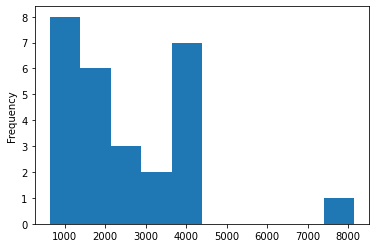

In [ ]:
y_train.value_counts().sort_index().plot.hist()

The class labels are unbalanced. One label contains more than 8000 elements in the training dataset and another contains about 4000. The majority of the class labels contain between 1000 and 3000 elements.

In [ ]:
train_data
df=train_data.description.isnull().groupby([train_data["prdtypecode"]]).sum().astype(int).reset_index(name='count NaN')
df.set_index("prdtypecode",inplace=True)
df["Total"]=y_train.value_counts().sort_index()
df

,count NaN,Total
prdtypecode,,
10,2222,2492
40,1329,2029
50,389,1356
60,105,668
1140,1363,2121
1160,2871,3156
1180,509,636
1280,849,3853
1281,401,1675


As can be seen above, the description column contains many NaN values. But there are unevenly distributed among the different class labels. This could help predict the class label of the different products.

## Workflow

## The model to submit

The submission consists of ....

## Metric

The metric used in this challenge to rank the participants is the *weighted-F1 score*.

Scikit-Learn package has an F1 score implementation and can be used for this challenge with its average parameter set to "weighted".

## Benchmark Model

The benchmark algorithm uses two separate models for the images and the text. Participants can get an idea of the performances when these sources of informations are used separately. They are encouraged to use both these sources while designing a classifier, since they contain complementary information.

For the image data, a version of Residual Networks (ResNet) model (**reference**) is used. ResNet50 implementation from Keras is used as the base model. The details of the basic benchmark model can be found **in this notebook**. The model is a pre-trained ResNet50 with ImageNet dataset. 27 different layers from top are unfrozen, which include 8 Convolutional layers for the training. The final network contains 12,144,667 trainable and 23,643,035 non-trainable parameters.

For the text data a simplified CNN classifier used. Only the designation fields (product titles) are used in this benchmark model. The input size is the maximum possible designation length, 34 in this case. Shorter inputs are zero-padded. The architecture consists of an embedding layer and 6 convolutional, max-pooling blocks. The embeddings are trained with the entire architecture. Following is the model architecture:

Layer (type)	        Output Shape	        Number of Params	Connected to
InputLayer	            (None, 34)	            0	
Embedding Layer	        (None, 34, 300)	        17320500	        InputLayer
Reshape	                (None, 34, 300, 1)	    0	                Embedding Layer
Conv2D Block 1	        (None, 34, 1, 512)	    154112	            Reshape
MaxPooling2D Block 1	(None, 1, 1, 512)	    0	                Conv2D Block 1
Conv2D Block 2	        (None, 33, 1, 512)	    307712	            Reshape
MaxPooling2D Block 2	(None, 1, 1, 512)	    0	                Conv2D Block 2
Conv2D Block 3	        (None, 32, 1, 512)	    461312	            Reshape
MaxPooling2D Block 3	(None, 1, 1, 512)	    0	                Conv2D Block 2
Conv2D Block 4	        (None, 31, 1, 512)	    614912	            Reshape
MaxPooling2D Block 4	(None, 1, 1, 512)	    0	                Conv2D Block 2
Conv2D Block 5	        (None, 30, 1, 512)	    768512	            Reshape
MaxPooling2D Block 5	(None, 1, 1, 512)	    0	                Conv2D Block 2
Conv2D Block 6	        (None, 29, 1, 512)	    922112	            Reshape
MaxPooling2D Block 6	(None, 1, 1, 512)	    0	                Conv2D Block 2
Concatenate	            (None, 6, 1, 512)	    0	                All MaxPooling2D Blocks
Flatten	                (None, 3072)	        0	                Concatenate
Dropout Layer	        (None, 3072)	        0	                Flatten
Dense Layer	            (None, 27)	            8297	            Dropout Layer

This architecture contains total 20,632,143 trainable parameters.

* Layer (type)-----------------Output Shape-----------Number of Params------Connected to
* InputLaye-------------------(None, 34)--------------0	
* Embedding Layer-----------(None, 34, 300)---------17320500----------------InputLayer
* Reshape---------------------(None, 34, 300, 1)------0--------------------------Embedding Layer
* Conv2D Block 1-------------(None, 34, 1, 512)------154112-------------------Reshape
* MaxPooling2D Block 1------(None, 1, 1, 512)-------0--------------------------Conv2D Block 1
* Conv2D Block 2-------------(None, 33, 1, 512)------307712-------------------Reshape
* MaxPooling2D Block 2------(None, 1, 1, 512)-------0--------------------------Conv2D Block 2
* Conv2D Block 3-------------(None, 32, 1, 512)------461312-------------------Reshape
* MaxPooling2D Block 3------(None, 1, 1, 512)-------0--------------------------Conv2D Block 2
* Conv2D Block 4-------------(None, 31, 1, 512)------614912-------------------Reshape
* MaxPooling2D Block 4------(None, 1, 1, 512)-------0--------------------------Conv2D Block 2
* Conv2D Block 5-------------(None, 30, 1, 512)------768512-------------------Reshape
* MaxPooling2D Block 5------(None, 1, 1, 512)-------0--------------------------Conv2D Block 2
* Conv2D Block 6-------------(None, 29, 1, 512)------922112-------------------Reshape
* MaxPooling2D Block 6------(None, 1, 1, 512)-------0--------------------------Conv2D Block 2
* Concatenate-----------------(None, 6, 1, 512)-------0--------------------------All MaxPooling2D Blocks
* Flatten-----------------------(None, 3072)-----------0--------------------------Concatenate
* Dropout Layer---------------(None, 3072)-----------0--------------------------Flatten
* Dense Layer-----------------(None, 27)--------------8297----------------------Dropout Layer

### Benchmark Performance

Following are the weighted-F1 score obtained using the benchmark models described above:

Text: 0.8113

Images: 0.5534

As the benchmarking model using text is better performing, the Y benchmark file contains the output of the same.

## Submitting to the online challenge: [ramp.studio](http://ramp.studio)
